# XGBoost Model with Hyperparameter Tuning

## Load the dataset

In [1]:
# Import the pandas, numpy packages and dump from joblib
import pandas as pd
import numpy as np
from joblib import dump

In [2]:
# Load the saved sets from data/processed using numpy
X_train = np.load('../data/processed/X_train.npy')
X_val   = np.load('../data/processed/X_val.npy'  )
y_train = np.load('../data/processed/y_train.npy')
y_val   = np.load('../data/processed/y_val.npy'  )

## Train XGBoost Model

In [3]:
# Import the xgboost package as xgb
import xgboost as xgb

In [4]:
# Instantiate the XGBClassifier class into a variable called xgb_default
xgb_default = xgb.XGBClassifier()


In [5]:
# Fit the XGBoost model
xgb_default.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [6]:
from joblib import dump 

dump(xgb_default,  '../models/xgb_default.joblib')

['../models/xgb_default.joblib']

In [7]:
# Calculate the probability when target=1
probs_train=xgb_default.predict_proba(X_train)[:,1]
probs_val=xgb_default.predict_proba(X_val)[:,1]

In [8]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
import sys
sys.path.insert(1, '..')
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train, y_probs=probs_train,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.9992287520666595
ROC AUC Score Validation: 0.662915262397689


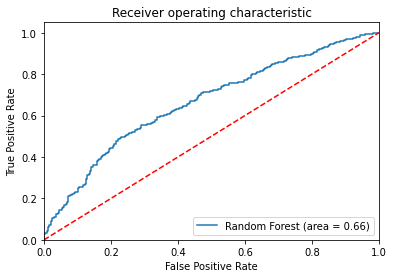

In [9]:
# Import roc_curve, matplotlib.pyplot and roc_auc_score and display the roc-auc plot
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

rf_roc_auc = roc_auc_score(y_val,probs_val)
fpr, tpr, thresholds = roc_curve(y_val, probs_val)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## Hyperparameter Tuning

## Manual Search

In [175]:
xgb_manual = xgb.XGBClassifier(
    n_estimators=100,
    eta=0.02,
    max_depth=3,
    subsample=0.8, 
    scale_pos_weight=0.2,
    min_child_weight=1.5,
    gamma=5)

In [176]:
# Fit the XGBoost model
xgb_manual.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.02,
              eval_metric=None, feature_types=None, gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0199999996,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1.5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [177]:
# Calculate the probability when target=1
probs_train=xgb_manual.predict_proba(X_train)[:,1]
probs_val=xgb_manual.predict_proba(X_val)[:,1]

In [178]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
import sys
sys.path.insert(1, '..')
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train, y_probs=probs_train,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.7185437628665935
ROC AUC Score Validation: 0.7171386013480983


### Grid Search

In [152]:
from sklearn.model_selection import GridSearchCV
import numpy as np


In [164]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [169]:
parameters = {
    'max_depth': range (2, 3, 1),
    'n_estimators': range(50, 100, 25),
    'learning_rate': [0.01, 0.02, 0.03,0.04,0.05],
    'subsample': [0.7,0.8,0.9]
}

In [170]:
grid_search=GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='roc_auc',
    cv=10,
    verbose=True )

In [171]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'max_depth': range(2, 3),
                         'n_estimators': range(50, 100, 25),
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='roc_auc', verbose=True)

In [172]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [173]:
# Calculate the probabilities for train and validation datasets
probs_train=grid_search.predict_proba(X_train)[:,1]
probs_val=grid_search.predict_proba(X_val)[:,1]

In [174]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
import sys
sys.path.insert(1, '..')
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train, y_probs=probs_train,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.7152847829475393
ROC AUC Score Validation: 0.7163396726047182


### Hyperopt package

In [111]:
# Import Trials, STATUS_OK, tpe, hp, fmin from hyperopt package
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin

In [144]:
# Define the search space for xgboost hyperparameters
space = {
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.05, 0.005),
    'subsample' : hp.quniform('subsample', 0.7, 0.9, 0.05),
    'scale_pos_weight': hp.quniform('scale_pos_weight', 0.1, 1.0, 0.1),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 0.5),
    'gamma': hp.quniform('gamma', 2, 6, 0.5)
}

In [145]:
# Define a function called objective
def objective(space):
    from sklearn.model_selection import cross_val_score
    
    xgboost = xgb.XGBClassifier(
        max_depth=3,
        learning_rate = space['learning_rate'],
        subsample = space['subsample'],
        scale_pos_weight=space['scale_pos_weight'],
        min_child_weight = space['min_child_weight'],
        gamma = space['gamma']
    )
    
    roc_auc = cross_val_score(xgboost, X_train, y_train, cv=10, scoring="roc_auc").mean()

    return{'loss': 1-roc_auc, 'status': STATUS_OK }

In [146]:
# Launch Hyperopt search and save the result in a variable called best
best = fmin(
    fn=objective,   
    space=space,       
    algo=tpe.suggest,       
    max_evals=5
)

100%|██████████| 5/5 [00:18<00:00,  3.77s/trial, best loss: 0.30971948422567663]


In [147]:
print("Best:", best)

Best: {'gamma': 3.0, 'learning_rate': 0.035, 'min_child_weight': 9.5, 'scale_pos_weight': 0.4, 'subsample': 0.7000000000000001}


In [148]:
xgboost1 = xgb.XGBClassifier(
    max_depth = 3,
    learning_rate = best['learning_rate'],
    min_child_weight = best['min_child_weight'],
    subsample = best['subsample'],
    # colsample_bytree = best['colsample_bytree'],
    scale_pos_weight=best['scale_pos_weight'],
    gamma=best['gamma']
)

In [149]:
xgboost1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.035, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=9.5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [150]:
# Calculate the probability when target=1
probs_train=xgboost1.predict_proba(X_train)[:,1]
probs_val=xgboost1.predict_proba(X_val)[:,1]

In [151]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
import sys
sys.path.insert(1, '..')
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train, y_probs=probs_train,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.7338292143228341
ROC AUC Score Validation: 0.7200273832450651


## Load and clean the test dataset

In [179]:
# Load the pandas and numpy packages
import pandas as pd
import numpy as np

In [180]:
# Import csv file of test data and save into data_test
data_test=pd.read_csv('../data/raw/2022_test.csv')

In [181]:
# Create a copy of data_test and save it into a variable data_test_cleaned
data_test_cleaned=data_test.copy()

In [182]:
# Remove the columns of id, 3P Made, 3PA, 3P% and BLK
data_test_cleaned.drop(['Id','3P Made','3PA','3P%','BLK'],axis=1,inplace=True)

In [183]:
# Add the columns 'TOTAL_MIN','TOTAL_PTS' and 'FG/FT'
data_test_cleaned['TOTAL_MIN']=data_test_cleaned['MIN'] * data_test_cleaned['GP']
data_test_cleaned['TOTAL_PTS']=data_test_cleaned['PTS'] * data_test_cleaned['GP']
data_test_cleaned['FG/FT']=data_test_cleaned['FG%']/data_test_cleaned['FT%']


In [184]:
#  Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [185]:
# Instantiate the StandardScaler
scaler=StandardScaler()

In [186]:
# Fit and apply the scaling on data_test_cleaned
data_test_cleaned=scaler.fit_transform(data_test_cleaned)

In [187]:
# Create the variable X_test
X_test=data_test_cleaned

## Predict probabilities of target for test data

In [195]:
# Calculate the probabilities for test datasets
probs_test=xgb_manual.predict_proba(X_test)[:,1]

In [196]:
# Join the probs_test column into data_test
data_test['TARGET_5Yrs']=probs_test

In [197]:
# Export the csv file 'rf_submission_091122.csv' for Kaggle submission
output=data_test[['Id','TARGET_5Yrs']]
output.to_csv('../xgb_manual_submission_201122.csv',index=False)